In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sb
import anndata as ad
import pandas as pd

In [101]:
df  = pd.read_csv("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\sma\\sma\\V11T16-085\\V11T16-085_C1\\output_data\\V11T16-085_C1_MSI\\V11T17-085_C1.Visium.FMP.220826_smamsi.csv")

In [102]:
print(df.shape)
location = df.iloc[:,[0,1]]
df=df.iloc[:,2:]
print(df.shape)

(8352, 1540)
(8352, 1538)


In [103]:
adata = ad.AnnData(df)
print(location.values)
adata.obsm['spatial'] = location.values

I:\mutiomics\pythonProject\.venv\lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[[ 0  0]
 [ 0  1]
 [ 0  2]
 ...
 [95 84]
 [95 85]
 [95 86]]


In [104]:
print(location)

       x   y
0      0   0
1      0   1
2      0   2
3      0   3
4      0   4
...   ..  ..
8347  95  82
8348  95  83
8349  95  84
8350  95  85
8351  95  86

[8352 rows x 2 columns]


In [105]:
adata

AnnData object with n_obs × n_vars = 8352 × 1538
    obsm: 'spatial'

In [106]:
sc.pp.normalize_total(adata, inplace = True,exclude_highly_expressed=False)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=300, inplace=True)

normalizing counts per cell


I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\preprocessing\_normalization.py:233: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [107]:
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata,n_neighbors=5)

sc.tl.umap(adata)
sc.tl.leiden(adata, key_added='clusters')

computing PCA


I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\preprocessing\_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:30)
computing UMAP


I:\mutiomics\pythonProject\.venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)
running Leiden clustering
    finished: found 148 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


-----
anndata     0.10.7
scanpy      1.10.1
-----
PIL                         10.3.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.14.0
certifi                     2024.02.02
cffi                        1.16.0
charset_normalizer          3.3.2
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0.post0
debugpy                     1.8.1
decorator                   5.1.1
defusedxml                  0.7.1
exceptiongroup              1.2.1
executing                   2.0.1
fastjsonschema              NA
fqdn                        NA
h5py                        3.11.0
idna                        3.7
igraph                      0.11.4
ipykernel                   6.29.4
ipywidgets                  8.1.2
isoduration                 N

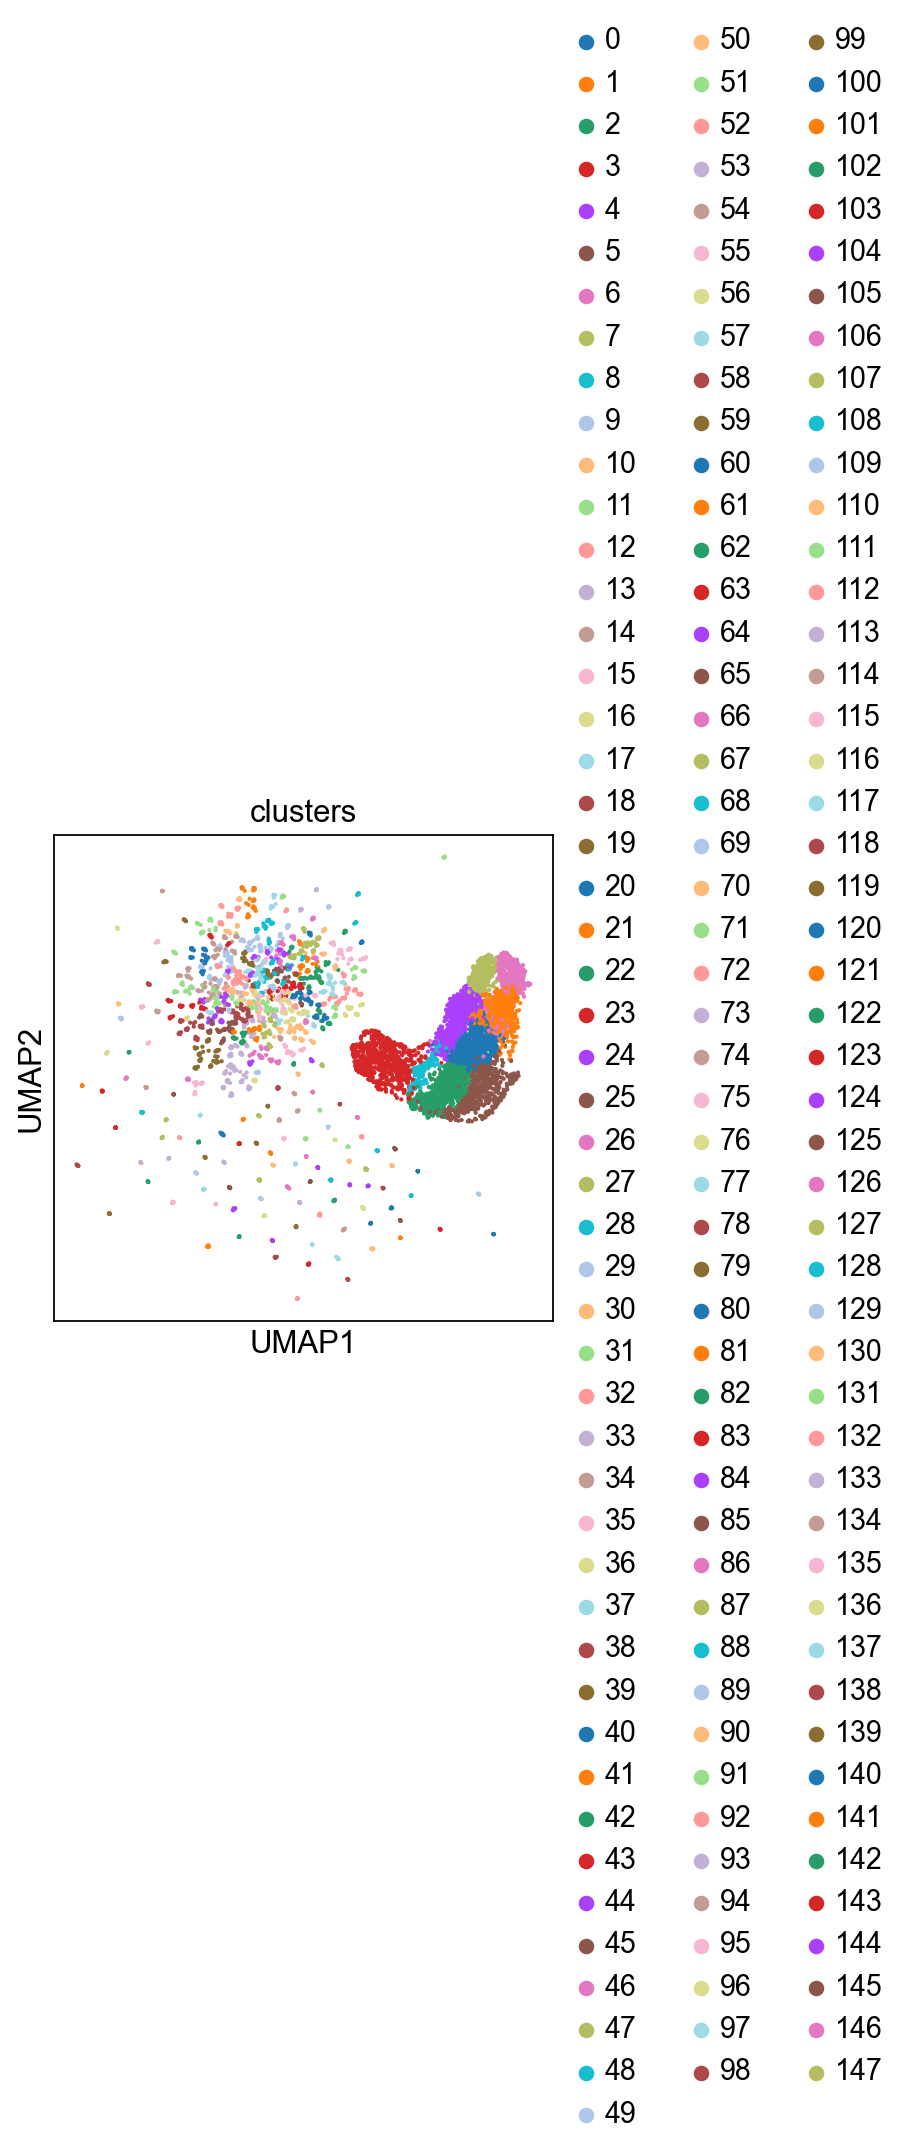

In [108]:
plt.rcParams['figure.figsize']=(8,8)
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)
sc.pl.umap(adata, color='clusters', palette=sc.pl.palettes.default_20)

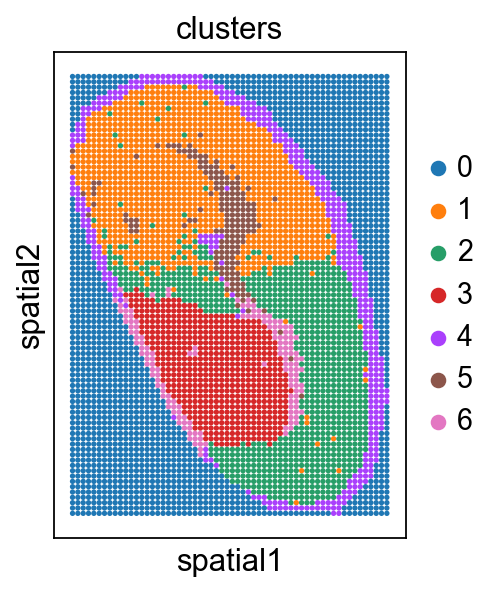

In [98]:
sc.pl.spatial(adata, img_key = "hires", color="clusters", spot_size=1)

In [99]:
adata.obsm['spatial']

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       ...,
       [59, 80],
       [59, 81],
       [59, 82]], dtype=int64)

In [100]:
adata.write("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\msi\\ITO3\\ITO3_C1\\output_data\\ITO3mPD4ITO.h5ad")